# Import Necessary Libraries and modules

In [1]:
!python -V

Python 3.6.12 :: Anaconda, Inc.


In [2]:
import numpy as np
import keras
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization,Flatten,Activation
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
#import seaborn as sns

# Directories of the datasets


In [3]:
train_directory='C:\\Users\\HP\\Desktop\\Flowers-Recognition-master\\train'
val_directory='C:\\Users\\HP\\Desktop\\Flowers-Recognition-master\\valid'
test_directory='C:\\Users\\HP\\Desktop\\Flowers-Recognition-master\\test'

# Rescaling the Images

In [4]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

# Using the flow from directory function for reading the images

In [5]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                  batch_size=256,
                                                 class_mode='sparse')
val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 batch_size=256,
                                                 color_mode='rgb',
                                                 class_mode='sparse')
test_generator=test_datagen.flow_from_directory(test_directory,
                                                batch_size=256,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse')

Found 906 images belonging to 5 classes.
Found 902 images belonging to 5 classes.
Found 906 images belonging to 5 classes.


# The Dictionary

In [6]:
num_classes=(len(train_generator.class_indices))

In [7]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Understanding the Data

In [8]:
breeds=list(train_generator.class_indices.keys())

In [9]:
x=list(train_generator.classes)

In [10]:
label=[]
for i in range (0,225):
    label.append(x.count(i))


# Using Resnet50v2 with imagenet weights

In [11]:
from tensorflow.keras.applications import ResNet50V2

In [12]:
convlayer=ResNet50V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

In [13]:
plot_model(convlayer)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Adding the layer to the Dense Layers

In [14]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax',kernel_initializer='glorot_uniform'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0

In [15]:
plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Use a small learning rate for better accuracy

In [16]:
optimizer=keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10
4/4 [==============================] - 573s 147s/step - loss: 1.6106 - accuracy: 0.4008 - val_loss: 0.5115 - val_accuracy: 0.8747
Epoch 2/10
4/4 [==============================] - 731s 131s/step - loss: 0.3702 - accuracy: 0.8767 - val_loss: 0.1114 - val_accuracy: 0.9712
Epoch 3/10
4/4 [==============================] - 500s 152s/step - loss: 0.2018 - accuracy: 0.9441 - val_loss: 0.0394 - val_accuracy: 0.9900
Epoch 4/10
4/4 [==============================] - 445s 111s/step - loss: 0.1265 - accuracy: 0.9774 - val_loss: 0.0177 - val_accuracy: 0.9933
Epoch 5/10
4/4 [==============================] - 371s 112s/step - loss: 0.0712 - accuracy: 0.9871 - val_loss: 0.0114 - val_accuracy: 0.9956
Epoch 6/10
4/4 [==============================] - 371s 104s/step - loss: 0.0565 - accuracy: 0.9909 - val_loss: 0.0039 - val_accuracy: 0.9989
Epoch 7/10
4/4 [==============================] - 372s 105s/step - loss: 0.0475 - accuracy: 0.9939 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 8/10
4/

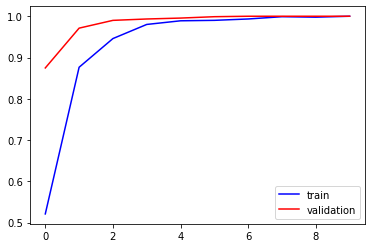

In [18]:
plt.plot(history.history['accuracy'],c='b',label='train')
plt.plot(history.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

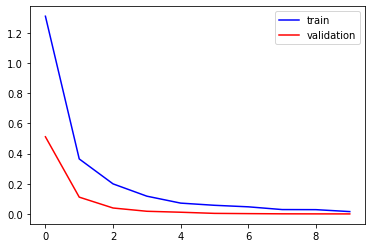

In [19]:
plt.plot(history.history['loss'],c='b',label='train')
plt.plot(history.history['val_loss'],c='r',label='validation')
plt.legend(loc='upper right')
plt.show()

# Check your Accuracy on the Test set

In [20]:
model.evaluate(test_generator)

4/4 [==============================] - 168s 39s/step - loss: 2.3158e-04 - accuracy: 1.0000


[0.00023158485419116914, 1.0]

# Check for Your Own Image

In [66]:
dct={"daisy":"People take wild daisy tea for coughs, bronchitis," 
                         "disorders of the liver and kidneys, and swelling (inflammation)."
                         "They also use it as a drying agent (astringent) and as a blood purifier." 
                         "Some people take homeopathic wild daisy for preventing problems during childbirth,"
                        "pain and soreness, and minor bleeding.", 
                 "rose":"It is very useful in heart disease, improves high blood pressure."
                     "Powder prepared of dried petals or simply the paste of the rose petals when applied over the wounds, provide quick healing."
                     " Application of paste of the petals over the body helps to regulate excessive sweating and gives pleasant smell. "
                     "Useful in eye problems, use of rose petals extract as drops or as eye wash, due to its anti-septic effect provides relief from burning sensation occurring in eyes."
                     " The dried paste of its petals Is quiet effective to manage the problem of gastritis and duodenal ulcer, "
                     "which can be Consumed in a dosage along with milk",
                 "dandelion":"In traditional Chinese and Native American medicine,"
                         "dandelion root has long been used to treat stomach and liver conditions."
                     " Herbalists today believe that it can aid in the treatment of many ailments, including"
                     "acne, eczema, high cholesterol, heartburn, gastrointestinal disorders, diabetes, and "
                     "even cancer. Dandelion is an herb that is native to Europe. It is also found throughout"
                     "mild climates of the northern hemisphere. People use dandelion for conditions such as "
                     "swelling (inflammation) of the tonsils (tonsillitis), infections of the kidney, bladder,"
                     " or urethra(urinary tract infections or UTIs), and many others, but there is no good "
                     "scientific evidence to support these uses.",
                "tulip":"Tulip medicinal uses are Have diuretic properties,It has anti-septic properties."
                     " Best remedy for Cough & Cold, Reduces risk of cancer, Used for sinus pain, "
                     "hay fever and headache are some of the Tulip health benefits."
                     " Cosmetic use of plant : Benefits of Tulip also comprise of cosmetic uses.",
                "sunflower":"The sunflower seed and sprout contain valuable antioxidant, antimicrobial, "
                     "anti-inflammatory, antihypertensive, wound-healing, and cardiovascular benefits found "
                     "in its phenolic compounds, flavonoids, polyunsaturated fatty acids, and vitamins"}

In [67]:
def predict(dir):
    img=image.load_img(dir,target_size=(224,224))
    img1=image.img_to_array(img)
    img1=img1/255
    img1=np.expand_dims(img1,[0])
    plt.imshow(img)
    pred=int((model.predict_classes(img1)))
    for key,values in train_generator.class_indices.items():
        if pred==values:
            print("The predicted image of the flower is: "+str(key)+" with a probability of "+str(round(np.max(model.predict_proba(img1))*100,2))+"%")
            #print("The predicted image of the flower is: "+str(key)+" with a probability of "+str(round(np.max(model.predict_proba(img1))*100,2))+"%")
            key=str(key)
            print("Medicinal Characteristics of",key) 
            print(key)
            print(dct[key])


            

# Example1

The predicted image of the flower is: dandelion with a probability of 100.0%
Medicinal Characteristics of dandelion
dandelion
In traditional Chinese and Native American medicine,dandelion root has long been used to treat stomach and liver conditions. Herbalists today believe that it can aid in the treatment of many ailments, includingacne, eczema, high cholesterol, heartburn, gastrointestinal disorders, diabetes, and even cancer. Dandelion is an herb that is native to Europe. It is also found throughoutmild climates of the northern hemisphere. People use dandelion for conditions such as swelling (inflammation) of the tonsils (tonsillitis), infections of the kidney, bladder, or urethra(urinary tract infections or UTIs), and many others, but there is no good scientific evidence to support these uses.


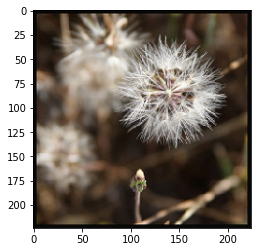

In [68]:
predict('C:\\Users\\HP\\Desktop\\Flowers-Recognition-master\\test\\dandelion\\dandelion (2).jpg')

# Example2

The predicted image of the flower is: rose with a probability of 100.0%
Medicinal Characteristics of rose
rose
It is very useful in heart disease, improves high blood pressure.Powder prepared of dried petals or simply the paste of the rose petals when applied over the wounds, provide quick healing. Application of paste of the petals over the body helps to regulate excessive sweating and gives pleasant smell. Useful in eye problems, use of rose petals extract as drops or as eye wash, due to its anti-septic effect provides relief from burning sensation occurring in eyes. The dried paste of its petals Is quiet effective to manage the problem of gastritis and duodenal ulcer, which can be Consumed in a dosage along with milk


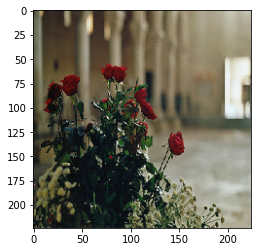

In [69]:
predict('C:\\Users\\HP\\Desktop\\Flowers-Recognition-master\\test\\rose\\roses (3).jpg')

The predicted image of the flower is: sunflower with a probability of 100.0%
Medicinal Characteristics of sunflower
sunflower
The sunflower seed and sprout contain valuable antioxidant, antimicrobial, anti-inflammatory, antihypertensive, wound-healing, and cardiovascular benefits found in its phenolic compounds, flavonoids, polyunsaturated fatty acids, and vitamins


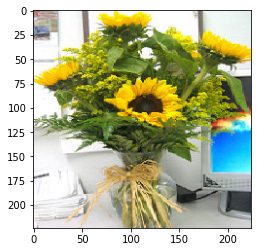

In [70]:
predict('C:\\Users\\HP\\Desktop\\Flowers-Recognition-master\\test\\sunflower\\sun (3).jpg')

The predicted image of the flower is: tulip with a probability of 100.0%
Medicinal Characteristics of tulip
tulip
Tulip medicinal uses are Have diuretic properties,It has anti-septic properties. Best remedy for Cough & Cold, Reduces risk of cancer, Used for sinus pain, hay fever and headache are some of the Tulip health benefits. Cosmetic use of plant : Benefits of Tulip also comprise of cosmetic uses.


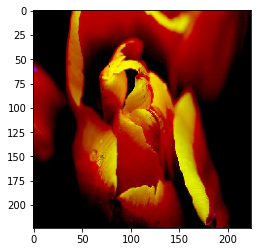

In [71]:
predict('C:\\Users\\HP\\Desktop\\Flowers-Recognition-master\\test\\tulip\\tulip (1).jpg')

The predicted image of the flower is: daisy with a probability of 99.98%
Medicinal Characteristics of daisy
daisy
People take wild daisy tea for coughs, bronchitis,disorders of the liver and kidneys, and swelling (inflammation).They also use it as a drying agent (astringent) and as a blood purifier.Some people take homeopathic wild daisy for preventing problems during childbirth,pain and soreness, and minor bleeding.


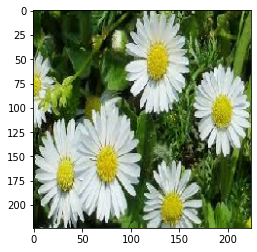

In [72]:
predict('C:\\Users\\HP\\Desktop\\Flowers-Recognition-master\\daisy.jpg')